In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction

In this exercise, we look to visualize the distribution of income for the Mexican population. We obtain the data from the National Poll of Employment and Unemployment (ENOE) for the third quarter of 2022. 

We have some questions of interest:
  - Is there a difference in the distribution of income for men and women?
  - Is the distribution of income by life stages different?
  - Is the distribution of income by education more as the level of schooling goes up?
  
We will seek to answer these questions by means of basic statistics. But, keep in mind that more complicated models could be developed.

But first, let us do some data wrangling.

In [2]:
### Define function to get age into life stages.
def etapa_vida(row):
    if row['eda']  < 25:
        val = '0'
    elif (row['eda'] >= 25) & (row['eda'] < 45):
        val = '1'
    elif (row['eda'] >= 45) & (row['eda'] < 65):
        val = '2'
    elif (row['eda'] >= 65):
        val = '3'
    else:
        val = '-1'
    return val

In [3]:
### Define function to get schooling years into levels of education.
def niv_ed(row):
    if row['anios_esc'] == 0:
        val = '0'
    elif (0 < row['anios_esc']) and (row['anios_esc'] <= 6):
        val = '1'
    elif (6 < row['anios_esc']) and (row['anios_esc'] <= 9):
        val = '2'
    elif (9 < row['anios_esc']) and (row['anios_esc'] <= 12):
        val = '3'
    elif (12 < row['anios_esc']) and (row['anios_esc'] <= 16):
        val = '4'
    elif 16 < row['anios_esc']:
        val = '5'
    else:
        val = '100'
    return val

In [4]:
# reading csv files
data_file = r'C:\Users\luis9\OneDrive\Datos\MX_Ingreso_2020.csv'
df_0 =  pd.read_csv(data_file, sep=",", low_memory=False)

In [5]:
# cleaning csv files (Removes missing/incomplete observations)
to_drop = ["ingocup", "n_hij"]
df_0.drop(to_drop, inplace=True, axis=1)
df_0.head()

# remove missing observations
df_0.dropna(inplace=True)
df_0 = df_0[df_0.sex != ' ']

In [6]:
# check datatypes
df_0.dtypes

sex           object
eda           object
anios_esc    float64
ing_x_hrs    float64
e_con         object
dtype: object

In [7]:
# Filter so we have income greater than 0
df_1 = df_0[df_0['ing_x_hrs'] > 0]

# Apply functions to get data into desired form
df_1['niv_ed']   = df_1.apply(niv_ed, axis=1)

df_1['eda']      = df_1[['eda']].astype(float)
df_1['Etapa']    = df_1.apply(etapa_vida, axis=1)

C:\Users\luis9\AppData\Local\Temp\ipykernel_12908\2151848486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['niv_ed']   = df_1.apply(niv_ed, axis=1)
C:\Users\luis9\AppData\Local\Temp\ipykernel_12908\2151848486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['eda']      = df_1[['eda']].astype(float)
C:\Users\luis9\AppData\Local\Temp\ipykernel_12908\2151848486.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### Data Visualization

Since we have 128,823 observations in the dataset, we will use the Boxenplot for visualization since it handles big data better than the traditional boxplot. In particular, it shows more information about the upper and lower quantiles of the distribution and misclassifies less extreme values.

In [8]:
n = df_1.shape[0]
n

128823

First, the boxenplot for the income per hour of the whole population:

Text(0.5, 0, 'Income per Hour (in Mexican Pesos)')

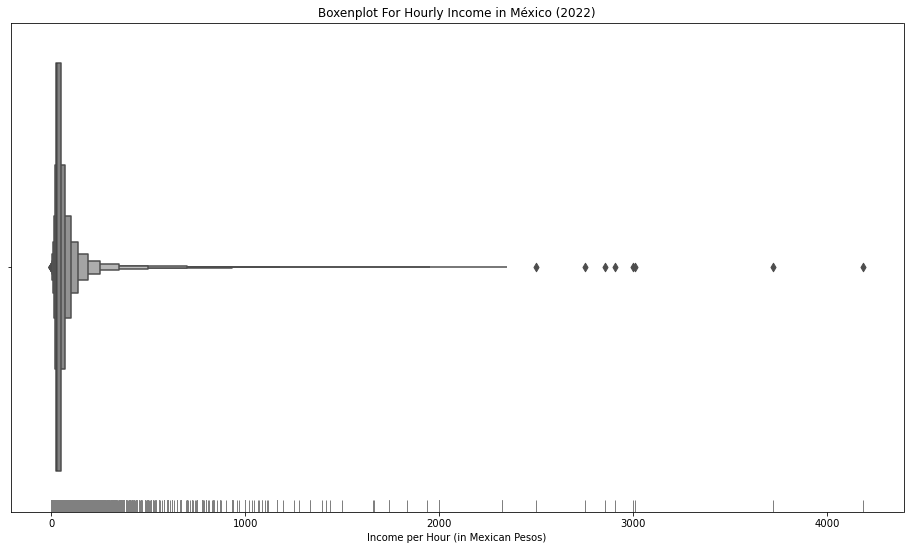

In [9]:
plt.figure(figsize=(16,9))
sns.boxenplot(x=df_1['ing_x_hrs'], color='grey')
sns.rugplot(    df_1['ing_x_hrs'], color='grey')

plt.title('Boxenplot For Hourly Income in México (2022)')
plt.xlabel('Income per Hour (in Mexican Pesos)')

We can see that there are extreme values after 2,500 mexican pesos per hour. Let us zoom in so we can have a better look at the boxenplot.

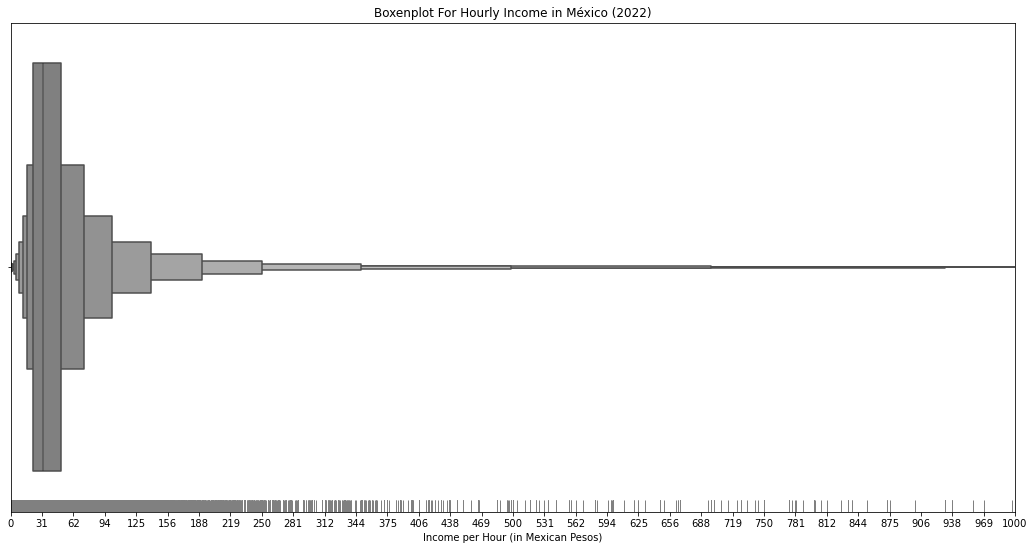

In [10]:
plt.figure(figsize=(18,9))
sns.boxenplot(x=df_1['ing_x_hrs'], color='grey')
sns.rugplot(    df_1['ing_x_hrs'], color='grey')

plt.title('Boxenplot For Hourly Income in México (2022)')
plt.xlabel('Income per Hour (in Mexican Pesos)')
plt.xlim(0, 1000)
plt.xticks(np.linspace(0,1000,33));

In [11]:
df_1['ing_x_hrs'].mean()

44.787584437555914

In [12]:
df_1['ing_x_hrs'].median()

31.82

The zoomed-in boxen plot for the hourly income in México suggests that the median hourly income is 31.82 pesos, as marked by the line in the biggest rectangle. Also, about 25% of the employed population earns about 22.22 or less pesos per hour. Similarly, 75% of the working population earns 50 pesos, or less, per hour. 

From the boxenplot, we can also see that the distribution is skewed to the right, that means that the values of the distribution gets concentrated at the left of the medina. Also, the mean would not be a good location parameter since it would be bigger than the median.

Now, let us estimate the distribution of hourly income for the genders.

Text(0, 0.5, 'Gender')

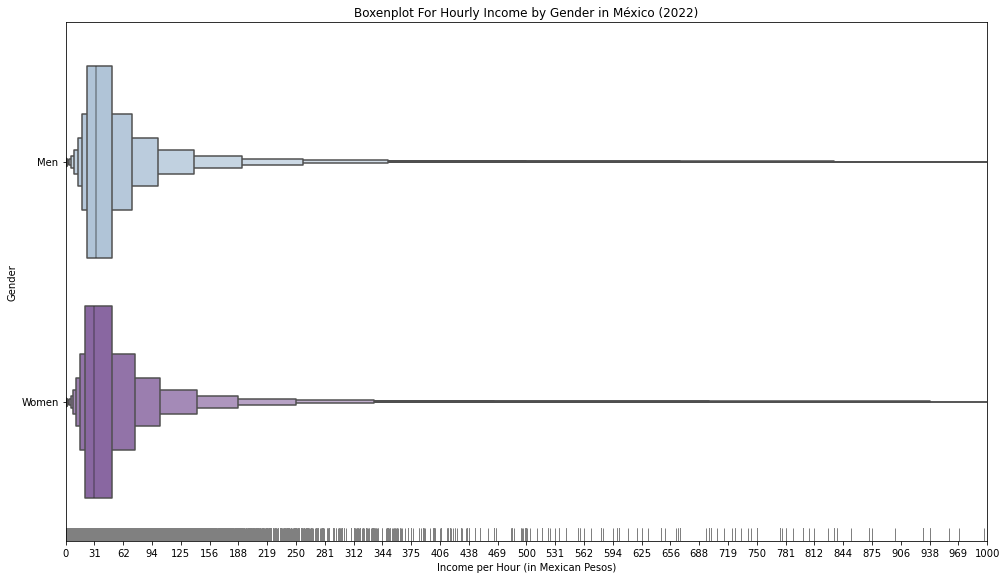

In [13]:
fig = plt.figure(figsize=(16,9))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

sns.boxenplot(data=df_1, x="ing_x_hrs", y="sex", palette="BuPu")
sns.rugplot(df_1['ing_x_hrs'], color='grey')

plt.title('Boxenplot For Hourly Income by Gender in México (2022)')
plt.xlabel('Income per Hour (in Mexican Pesos)')
plt.xlim(0, 1000)
plt.xticks(np.linspace(0,1000,33))

plt.yticks([0,1])
ax.set_yticklabels(['Men', 'Women']);
plt.ylabel('Gender')

In [14]:
df_1.groupby('sex')['ing_x_hrs'].median()

sex
1.00    32.80
2.00    31.01
Name: ing_x_hrs, dtype: float64

Now, the boxenplot suggests that the median income for men and women is 32.80 and 31.01 pesos, respectively. So, men do seem to earn more than women. Assuming 40 hours in a week of work, men earn around (40*(32.80-31.01) =) 71 pesos more than women in a week. Also, note that the tails of the distribution is thicker for men, as illustrated by the larger corresponding rectangles in the boxenplot, this means that men earn more pesos for an hour of work.

Text(0, 0.5, 'Life Stage')

<Figure size 1152x648 with 0 Axes>

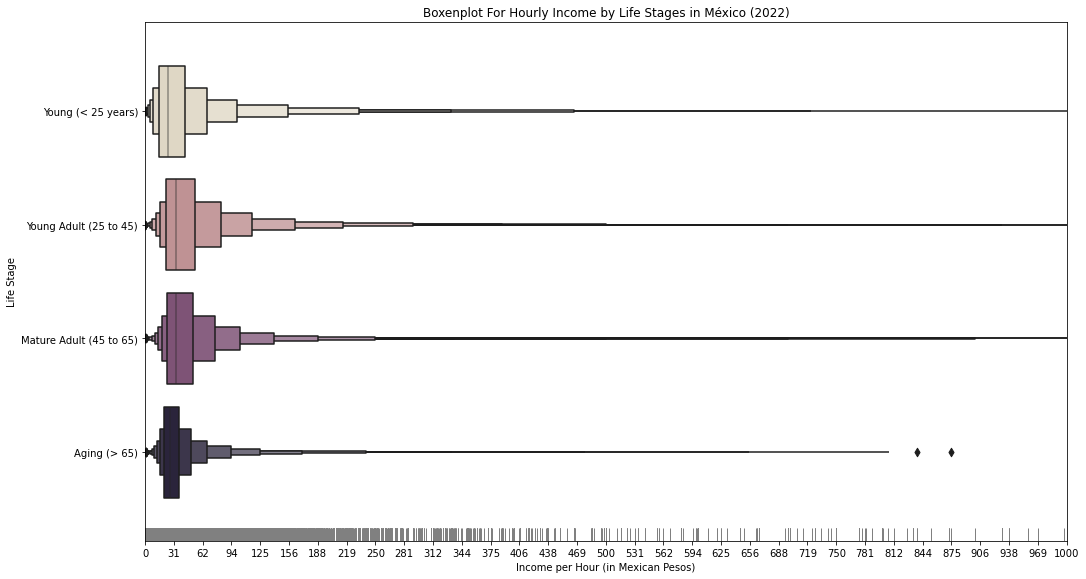

In [15]:
plt.figure(figsize=(16,9))

fig = plt.figure(figsize=(16,9))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

sns.boxenplot(data=df_1, x="ing_x_hrs", y="Etapa",
              palette = "ch:s=-.2,r=.6",
              order   = np.flip(np.arange(0,4).astype(str)))
sns.rugplot(df_1['ing_x_hrs'], color='grey')

plt.title('Boxenplot For Hourly Income by Life Stages in México (2022)')
plt.xlabel('Income per Hour (in Mexican Pesos)')
plt.xlim(0, 1000)
plt.xticks(np.linspace(0,1000,33))

plt.yticks([0,1,2,3])
ax.set_yticklabels(['Young (< 25 years)', 'Young Adult (25 to 45)', 'Mature Adult (45 to 65)', 'Aging (> 65)']);
plt.ylabel('Life Stage')

In [16]:
df_1.groupby('Etapa')['ing_x_hrs'].median()

Etapa
0    26.67
1    33.33
2    33.33
3    25.00
Name: ing_x_hrs, dtype: float64

The distribution of hourly income by life stages starts with a median of 26.67 pesos per hour for young people, the median hourly income for young adults and mature adults is 33.33 pesos for both age groups, and the median for aging people is 25 pesos per hour. We can note that the income per hour by life stage increases and then decreases.

Text(0, 0.5, 'Life Stage')

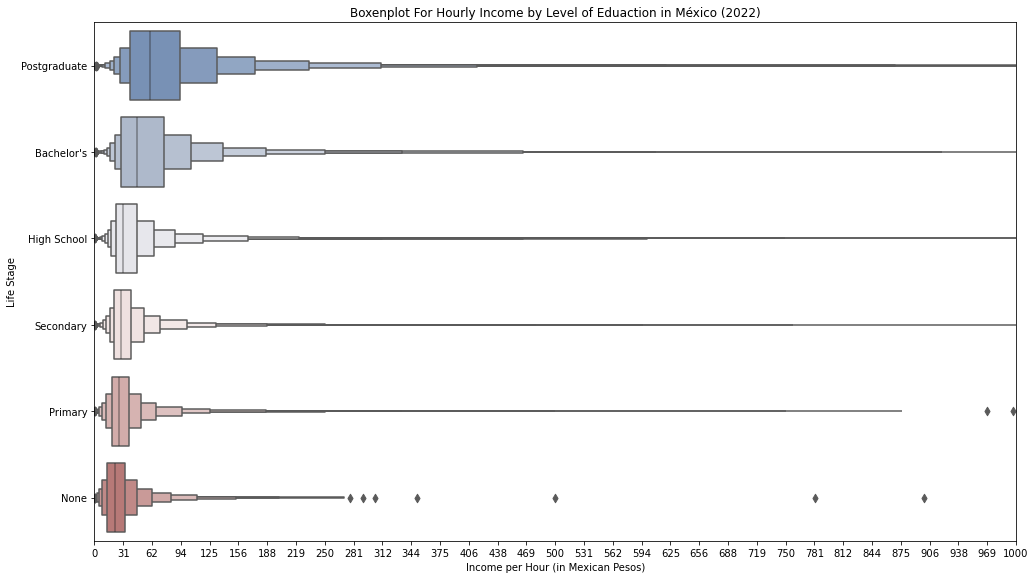

In [17]:
fig = plt.figure(figsize=(16,9))
ax  = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

sns.boxenplot(data=df_1, x="ing_x_hrs", y="niv_ed",
              palette = "vlag",
              order=np.flip(np.arange(0,6).astype(str)))

plt.xlim(0,1000)


plt.title('Boxenplot For Hourly Income by Level of Eduaction in México (2022)')
plt.xlabel('Income per Hour (in Mexican Pesos)')
plt.xlim(0, 1000)
plt.xticks(np.linspace(0,1000,33))

plt.yticks([0,1,2,3,4,5])
ax.set_yticklabels(['Postgraduate', 'Bachelor\'s', 'High School', 'Secondary',  'Primary', 'None']);
plt.ylabel('Life Stage')

In [18]:
df_1.groupby('niv_ed')['ing_x_hrs'].median()

niv_ed
0    22.22
1    26.67
2    29.07
3    31.36
4    46.51
5    60.00
Name: ing_x_hrs, dtype: float64

From the boxenplots, we can see that the distribution of hourly income is increasing as the level of education is higher. For those who are not educated the median hourly income is 22.22 pesos per hour, for individuals with primary education the median income per hour is 26.67 pesos, for those persons with secondary and highschool the hourly income is 29.07 and 31.36 pesos respectively, and for people with a Bachelor's degree or postgraduate education, the median income per hour is 46.51 and 60 pesos, respectively.

### Conclusions

From our simple analysis with basic statistics, we can conclude the following:
   - Males tend to earn more per hour than females.
   - The income per hour has diminishing returns depending on the life stage.
   - People with a higher level of education do have more income per hour.